In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer.csv')

In [3]:
df.head()

,id,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
miss = df.isnull().sum()
miss

id                         0
Diagnosis                  0
Radius_mean                0
Texture_mean               0
Perimeter_mean             0
Area_mean                  0
Smoothness_mean            0
Compactness_mean           0
Concavity_mean             0
Concave points_mean        0
Symmetry_mean              0
Fractal_dimension_mean     0
Radius_se                  0
Texture_se                 0
Perimeter_se               0
Area_se                    0
Smoothness_se              0
Compactness_se             0
Concavity_se               0
Concave points_se          0
Symmetry_se                0
Fractal_dimension_se       0
Radius_worst               0
Texture_worst              0
Perimeter_worst            0
Area_worst                 0
Smoothness_worst           0
Compactness_worst          0
Concavity_worst            0
Concave points_worst       0
Symmetry_worst             0
Fractal_dimension_worst    0
dtype: int64

In [5]:
df = df.drop(columns=['id'])

In [6]:
df['Diagnosis'] = df ['Diagnosis'].map({'M': 1, 'B': 0})
# M - malignant (cancerous) 1 true
# B - benign(non-cancerous) 0 false 

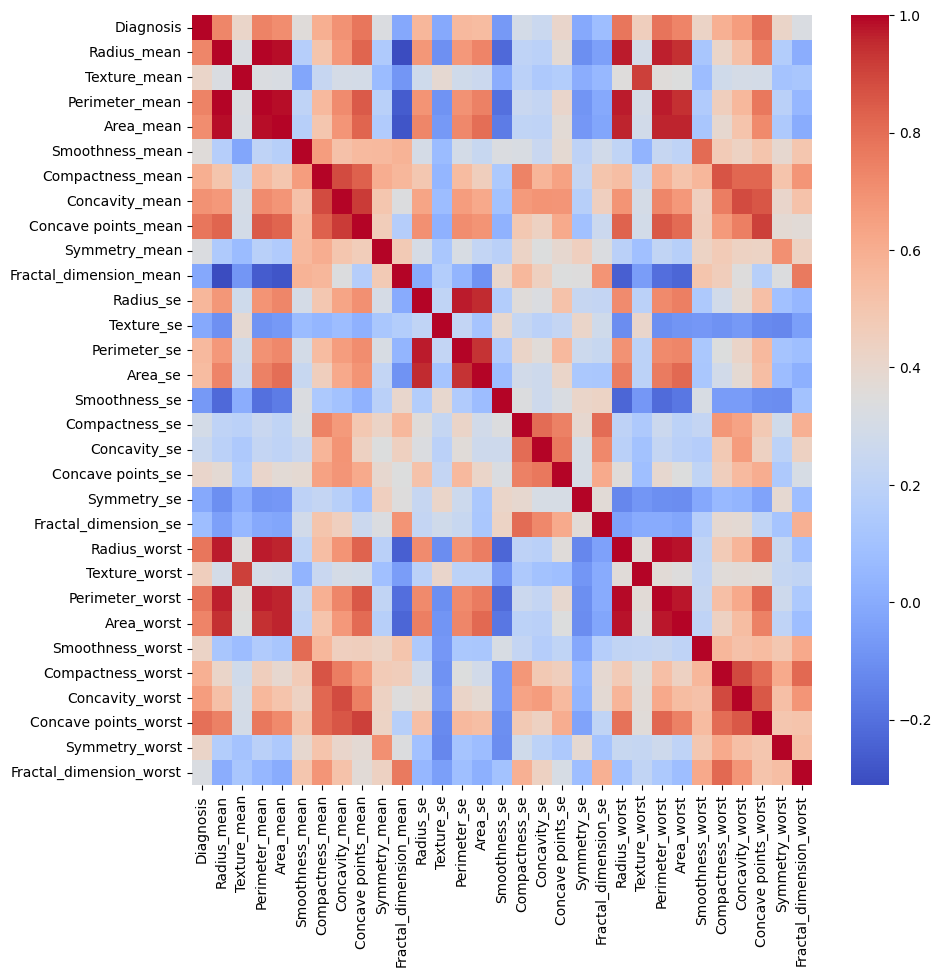

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot =  False, cmap = 'coolwarm')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
# creating of model

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print('Confusion Matrix::',confusion_matrix(y_test,y_pred))

print('Classification Report::',classification_report(y_test,y_pred))

print("Accuracy::",accuracy_score(y_test,y_pred))

Confusion Matrix:: [[71  0]
 [ 6 37]]
Classification Report::               precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy:: 0.9473684210526315


In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[fit.support_]
print("selected features:", selected_features)


selected features: Index(['Concave points_mean', 'Radius_se', 'Area_se', 'Compactness_se',
       'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst',
       'Concavity_worst', 'Concave points_worst'],
      dtype='object')


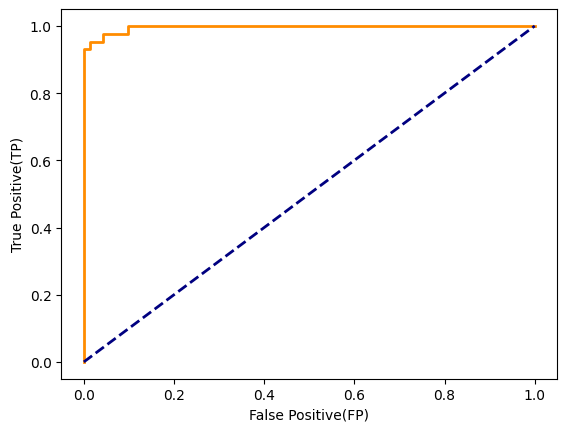

Roc_auc score: 0.9963969865705863


In [13]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

svm_model = svm.SVC(kernel='linear', probability=True) # default()
svm_model.fit(X_train_scaled, y_train)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  # probabilities of positive 

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # DEFAULT

plt.xlabel('False Positive(FP)')
plt.ylabel('True Positive(TP)')
plt.show()
print("Roc_auc score:", roc_auc)


In [14]:
#model comparison
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': svm_model 
}
# HYper parameter de Əlavə etmək olar və daha sonra GridSearch ilə fərqləri görə bilərik
# Əlavə etmişdim sadəcə compile olmadı çünki 5 dəqiqədən çox oldu və məndə dayandırdım siz əlavə edib yenisini yaza bilərsiz comparison edərək təbiiki()
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 0.51
Random Forest Accuracy: 0.63
Support Vector Machine Accuracy: 0.71


In [15]:
import joblib
joblib.dump(svm_model, 'svm_breast_cancer_model.pkl')

['svm_breast_cancer_model.pkl']